In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Final Defense (Atik & Rad)/Typhoid/Typhoid-main-file/Final_Typhoid_F_Encoded.csv')

In [ ]:
df.describe()

,age,sex,headache,RETRO-OCULAR PAIN,muscle or muscle joint pain,NAUSEA,Rash,fast heart rate,bloody cough,less urination,...,Diarrhea or constipation,Loss of appetite,Cough,fatigue,weight loss,Swollen stomach,Abdominal pain,Difficulty paying attention,Agitation,hallucinations
count,1742.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,...,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,33.758037,0.506873,0.796105,0.252577,0.676403,0.505727,0.166094,0.170103,0.030355,0.147766,...,0.532073,0.499427,0.523482,0.567583,0.552692,0.519473,0.521191,0.536082,0.561856,0.548110
std,20.199397,0.500096,0.403007,0.434615,0.467982,0.500110,0.372272,0.375831,0.171612,0.354970,...,0.499113,0.500143,0.499591,0.495553,0.497358,0.499764,0.499694,0.498839,0.496301,0.497823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1742 non-null   float64
 1   sex                           1746 non-null   int64  
 2   headache                      1746 non-null   int64  
 3   RETRO-OCULAR PAIN             1746 non-null   int64  
 4   muscle or muscle joint pain   1746 non-null   int64  
 5   NAUSEA                        1746 non-null   int64  
 6   Rash                          1746 non-null   int64  
 7   fast heart rate               1746 non-null   int64  
 8   bloody cough                  1746 non-null   int64  
 9   less urination                1746 non-null   int64  
 10  Nose Bleeding                 1732 non-null   float64
 11  Shortness of breath-asphyxia  1732 non-null   float64
 12  SENSORY CHANGE                1732 non-null   float64
 13  VOM

In [ ]:
df.isnull().sum()

age                              4
sex                              0
headache                         0
RETRO-OCULAR PAIN                0
muscle or muscle joint pain      0
NAUSEA                           0
Rash                             0
fast heart rate                  0
bloody cough                     0
less urination                   0
Nose Bleeding                   14
Shortness of breath-asphyxia    14
SENSORY CHANGE                  14
VOMITING                        14
traveler                        25
Swollen eyelid                  27
muscle stiffness                27
Sweating                         0
Diarrhea or constipation         0
Loss of appetite                 0
Cough                            0
fatigue                          0
weight loss                      0
Swollen stomach                  0
Abdominal pain                   0
Difficulty paying attention      0
Agitation                        0
hallucinations                   0
Fever Type          

# Missing Value Handlig

Age

In [ ]:
df['age'].fillna(int(df['age'].mean()), inplace=True)

Nose Bleeding 

In [ ]:
df['Nose Bleeding'].value_counts()

0.0    1661
1.0      71
Name: Nose Bleeding, dtype: int64

In [ ]:
df['Nose Bleeding'].fillna(0, inplace=True)

Shortness of breath-asphyxia

In [ ]:
df['Shortness of breath-asphyxia'].value_counts()

0.0    1470
1.0     262
Name: Shortness of breath-asphyxia, dtype: int64

In [ ]:
df['Shortness of breath-asphyxia'].fillna(0, inplace=True)

SENSORY CHANGE 

In [ ]:
df['SENSORY CHANGE'].value_counts()

0.0    1564
1.0     168
Name: SENSORY CHANGE, dtype: int64

In [ ]:
df['SENSORY CHANGE'].fillna(0, inplace=True)

VOMITING

In [ ]:
df['VOMITING'].value_counts()

0.0    1704
1.0      28
Name: VOMITING, dtype: int64

In [ ]:
df['VOMITING'].fillna(0, inplace=True)

traveler

In [ ]:
df['traveler'].value_counts()

0.0    1177
1.0     544
Name: traveler, dtype: int64

In [ ]:
df['traveler'].fillna(0, inplace=True)

Swollen eyelid

In [ ]:
df['Swollen eyelid'].value_counts()

0.0    1433
1.0     286
Name: Swollen eyelid, dtype: int64

In [ ]:
df['Swollen eyelid'].fillna(0, inplace=True)

muscle stiffness

In [ ]:
df['muscle stiffness'].value_counts()

0.0    1609
1.0     110
Name: muscle stiffness, dtype: int64

In [ ]:
df['muscle stiffness'].fillna(0, inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

age                             0
sex                             0
headache                        0
RETRO-OCULAR PAIN               0
muscle or muscle joint pain     0
NAUSEA                          0
Rash                            0
fast heart rate                 0
bloody cough                    0
less urination                  0
Nose Bleeding                   0
Shortness of breath-asphyxia    0
SENSORY CHANGE                  0
VOMITING                        0
traveler                        0
Swollen eyelid                  0
muscle stiffness                0
Sweating                        0
Diarrhea or constipation        0
Loss of appetite                0
Cough                           0
fatigue                         0
weight loss                     0
Swollen stomach                 0
Abdominal pain                  0
Difficulty paying attention     0
Agitation                       0
hallucinations                  0
Fever Type                      0
dtype: int64

# Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1745
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1746 non-null   float64
 1   sex                           1746 non-null   int64  
 2   headache                      1746 non-null   int64  
 3   RETRO-OCULAR PAIN             1746 non-null   int64  
 4   muscle or muscle joint pain   1746 non-null   int64  
 5   NAUSEA                        1746 non-null   int64  
 6   Rash                          1746 non-null   int64  
 7   fast heart rate               1746 non-null   int64  
 8   bloody cough                  1746 non-null   int64  
 9   less urination                1746 non-null   int64  
 10  Nose Bleeding                 1746 non-null   float64
 11  Shortness of breath-asphyxia  1746 non-null   float64
 12  SENSORY CHANGE                1746 non-null   float64
 13  VOM

In [ ]:
def target_attribute(x):
  if x=='Typhoid':
    return 1
  else:
    return 0
df['Fever Type']=df['Fever Type'].apply(target_attribute)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1745
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1746 non-null   float64
 1   sex                           1746 non-null   int64  
 2   headache                      1746 non-null   int64  
 3   RETRO-OCULAR PAIN             1746 non-null   int64  
 4   muscle or muscle joint pain   1746 non-null   int64  
 5   NAUSEA                        1746 non-null   int64  
 6   Rash                          1746 non-null   int64  
 7   fast heart rate               1746 non-null   int64  
 8   bloody cough                  1746 non-null   int64  
 9   less urination                1746 non-null   int64  
 10  Nose Bleeding                 1746 non-null   float64
 11  Shortness of breath-asphyxia  1746 non-null   float64
 12  SENSORY CHANGE                1746 non-null   float64
 13  VOM

In [ ]:
df.columns

Index(['age', 'sex', 'headache', 'RETRO-OCULAR PAIN',
       'muscle or muscle joint pain', 'NAUSEA', 'Rash', 'fast heart rate',
       'bloody cough', 'less urination', 'Nose Bleeding',
       'Shortness of breath-asphyxia', 'SENSORY CHANGE', 'VOMITING',
       'traveler', 'Swollen eyelid', 'muscle stiffness', 'Sweating',
       'Diarrhea or constipation', 'Loss of appetite', 'Cough', 'fatigue',
       'weight loss', 'Swollen stomach', 'Abdominal pain',
       'Difficulty paying attention', 'Agitation', 'hallucinations',
       'Fever Type'],
      dtype='object')

# Model building

In [ ]:
df.shape

(1746, 29)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1504, 29)

In [ ]:
x=df.drop(['Fever Type'],axis=1)
y=df['Fever Type']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=0,stratify=y)

In [ ]:
def roc_auc_values(MODEL):
  probs = MODEL.predict_proba(xtest)
  probs = probs[:, 1]
  auc = roc_auc_score(ytest, probs)
  fpr, tpr, _ = roc_curve(ytest, probs)
  a={'tpr':tpr,
     'fpr':fpr,
     'auc':auc
    }
  return a


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, RF.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, RF.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',RF.score(xtest,ytest))
print("Training accuracy:",RF.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, RF.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, RF.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, RF.predict(xtest),average='macro'))
probs = RF.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, RF.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(RF,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
rf=roc_auc_values(RF)

Confusion matrix is :
[[175   8]
 [  1 192]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       183
           1       0.96      0.99      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.976063829787234
Training accuracy: 99.7340425531915
F1 Score : 0.9760147993791065
Precision : 0.9771590909090908
Recall : 0.9755514029276027
AUC = 0.980
Sensitivity :  0.9943181818181818
Specificity :  0.96
false positive rate :  0.04
false negative rate :  0.005681818181818182
Negative Predictive Value :  0.9948186528497409
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.023936170212765957
10 fold cross validation:  [0.98013245 0.92715232 0.96688742 0.97350993 0.94       0.98666667
 0.96666667 0.97333333 0.97333333 0.98      ]
Mean of 10 fold cross val

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, DT.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, DT.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',DT.score(xtest,ytest))
print("Training accuracy:",DT.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, DT.predict(xtest),average='weighted'))
print("Precision :", precision_score(ytest, DT.predict(xtest),average='weighted'))
print("Recall :", recall_score(ytest, DT.predict(xtest),average='weighted'))
probs = DT.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, DT.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(DT,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
dt=roc_auc_values(DT)

Confusion matrix is :
[[175   8]
 [ 21 172]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       183
           1       0.96      0.89      0.92       193

    accuracy                           0.92       376
   macro avg       0.92      0.92      0.92       376
weighted avg       0.93      0.92      0.92       376



Testing accuracy :  0.9228723404255319
Training accuracy: 99.7340425531915
F1 Score : 0.9228510626257383
Precision : 0.9250401046943599
Recall : 0.9228723404255319
AUC = 0.929
Sensitivity :  0.8928571428571429
Specificity :  0.9555555555555556
false positive rate :  0.044444444444444446
false negative rate :  0.10714285714285714
Negative Predictive Value :  0.8911917098445595
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.07712765957446809
10 fold cross validation:  [0.96688742 0.91390728 0.96688742 0.94701987 0.92666667 0.95333333
 0.94       0.96666667 0.96       0.953333

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()

In [ ]:
ABC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, ABC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, ABC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',ABC.score(xtest,ytest))
print("Training accuracy:",ABC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, ABC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, ABC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, ABC.predict(xtest),average='macro'))
probs = ABC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ABC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(ABC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
abc=roc_auc_values(ABC)

Confusion matrix is :
[[175   8]
 [  1 192]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       183
           1       0.96      0.99      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.976063829787234
Training accuracy: 97.6063829787234
F1 Score : 0.9760147993791065
Precision : 0.9771590909090908
Recall : 0.9755514029276027
AUC = 0.985
Sensitivity :  0.9943181818181818
Specificity :  0.96
false positive rate :  0.04
false negative rate :  0.005681818181818182
Negative Predictive Value :  0.9948186528497409
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.023936170212765957
10 fold cross validation:  [0.99337748 0.94039735 0.98013245 0.98013245 0.94666667 0.98666667
 0.96       0.98666667 0.98666667 0.98      ]
Mean of 10 fold cross val

In [ ]:
import xgboost
XGB=xgboost.XGBClassifier()

In [ ]:
XGB.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, XGB.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, XGB.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',XGB.score(xtest,ytest))
print("Training accuracy:",XGB.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, XGB.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, XGB.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, XGB.predict(xtest),average='macro'))
probs = XGB.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, XGB.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(XGB,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
xgb=roc_auc_values(XGB)

Confusion matrix is :
[[175   8]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       183
           1       0.96      1.00      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.9787234042553191
Training accuracy: 97.6063829787234
F1 Score : 0.9786745313784987
Precision : 0.9800995024875622
Recall : 0.9781420765027322
AUC = 0.986
Sensitivity :  1.0
Specificity :  0.9601990049751243
false positive rate :  0.03980099502487562
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.02127659574468085
10 fold cross validation:  [0.99337748 0.94701987 0.98013245 0.98013245 0.94666667 0.98666667
 0.97333333 0.98666667 0.99333333 0.98      ]
Mean of 10 fold cross validation :  0.97673

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()

In [ ]:
MLP.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, MLP.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, MLP.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',MLP.score(xtest,ytest))
print("Training accuracy:",MLP.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, MLP.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, MLP.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, MLP.predict(xtest),average='macro'))
probs = MLP.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, MLP.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(MLP,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
mlp=roc_auc_values(MLP)

Confusion matrix is :
[[175   8]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       183
           1       0.96      1.00      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.9787234042553191
Training accuracy: 98.22695035460993
F1 Score : 0.9786745313784987
Precision : 0.9800995024875622
Recall : 0.9781420765027322
AUC = 0.987
Sensitivity :  1.0
Specificity :  0.9601990049751243
false positive rate :  0.03980099502487562
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.02127659574468085
10 fold cross validation:  [0.99337748 0.94701987 0.96688742 0.98013245 0.94666667 0.97333333
 0.98       0.98666667 0.99333333 0.98      ]
Mean of 10 fold cross validation :  0.9747

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier
ETC=ExtraTreesClassifier()

In [ ]:
ETC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, ETC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, ETC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',ETC.score(xtest,ytest))
print("Training accuracy:",ETC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, ETC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, ETC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, ETC.predict(xtest),average='macro'))
probs = ETC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ETC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(ETC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
etc=roc_auc_values(ETC)

Confusion matrix is :
[[175   8]
 [  4 189]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       183
           1       0.96      0.98      0.97       193

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



Testing accuracy :  0.9680851063829787
Training accuracy: 99.7340425531915
F1 Score : 0.9680407989800255
Precision : 0.9685222471145394
Recall : 0.967779382202214
AUC = 0.979
Sensitivity :  0.9776536312849162
Specificity :  0.9593908629441624
false positive rate :  0.04060913705583756
false negative rate :  0.0223463687150838
Negative Predictive Value :  0.9792746113989638
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.031914893617021274
10 fold cross validation:  [0.97350993 0.92715232 0.9602649  0.97350993 0.93333333 0.98
 0.96666667 0.96666667 0.96666667 0.97333333]
Mean

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
GBC= GradientBoostingClassifier()

In [ ]:
GBC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, GBC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, GBC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',GBC.score(xtest,ytest))
print("Training accuracy:",GBC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, GBC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, GBC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, GBC.predict(xtest),average='macro'))
probs = GBC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, GBC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(GBC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
gbc=roc_auc_values(GBC)

Confusion matrix is :
[[175   8]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       183
           1       0.96      1.00      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.9787234042553191
Training accuracy: 98.22695035460993
F1 Score : 0.9786745313784987
Precision : 0.9800995024875622
Recall : 0.9781420765027322
AUC = 0.986
Sensitivity :  1.0
Specificity :  0.9601990049751243
false positive rate :  0.03980099502487562
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.02127659574468085
10 fold cross validation:  [0.99337748 0.94701987 0.98013245 0.97350993 0.94       0.98
 0.97333333 0.98666667 0.99333333 0.98666667]
Mean of 10 fold cross validation :  0.9754039735

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss='log')

In [ ]:
SGDC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, SGDC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, SGDC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',SGDC.score(xtest,ytest))
print("Training accuracy:",SGDC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, SGDC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, SGDC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, SGDC.predict(xtest),average='macro'))
probs = SGDC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, SGDC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(SGDC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
sgdc=roc_auc_values(SGDC)

Confusion matrix is :
[[175   8]
 [  7 186]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       183
           1       0.96      0.96      0.96       193

    accuracy                           0.96       376
   macro avg       0.96      0.96      0.96       376
weighted avg       0.96      0.96      0.96       376



Testing accuracy :  0.9601063829787234
Training accuracy: 94.41489361702128
F1 Score : 0.9600722098332801
Precision : 0.9601506740681999
Recall : 0.9600073614768254
AUC = 0.976
Sensitivity :  0.9615384615384616
Specificity :  0.9587628865979382
false positive rate :  0.041237113402061855
false negative rate :  0.038461538461538464
Negative Predictive Value :  0.9637305699481865
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.0398936170212766
10 fold cross validation:  [0.98675497 0.94039735 0.94701987 0.9602649  0.94666667 0.98666667
 0.94666667 0.98       0.98       0.96   

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB=HistGradientBoostingClassifier()

In [ ]:
HGB.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, HGB.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, HGB.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',HGB.score(xtest,ytest))
print("Training accuracy:",HGB.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, HGB.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, HGB.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, HGB.predict(xtest),average='macro'))
probs = HGB.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, HGB.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(HGB,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
hgb=roc_auc_values(HGB)

Confusion matrix is :
[[175   8]
 [  5 188]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       183
           1       0.96      0.97      0.97       193

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



Testing accuracy :  0.9654255319148937
Training accuracy: 99.55673758865248
F1 Score : 0.9653841523437223
Precision : 0.965702947845805
Recall : 0.9651887086270845
AUC = 0.984
Sensitivity :  0.9722222222222222
Specificity :  0.9591836734693877
false positive rate :  0.04081632653061224
false negative rate :  0.027777777777777776
Negative Predictive Value :  0.9740932642487047
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.034574468085106384
10 fold cross validation:  [0.98013245 0.93377483 0.97350993 0.97350993 0.93333333 0.98
 0.97333333 0.98       0.98666667 0.98      ]
M

In [ ]:
from lightgbm import LGBMClassifier
LGBM=LGBMClassifier()

In [ ]:
LGBM.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, LGBM.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, LGBM.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',LGBM.score(xtest,ytest))
print("Training accuracy:",LGBM.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, LGBM.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, LGBM.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, LGBM.predict(xtest),average='macro'))
probs = LGBM.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, LGBM.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(LGBM,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
lgbm=roc_auc_values(LGBM)

Confusion matrix is :
[[175   8]
 [  5 188]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       183
           1       0.96      0.97      0.97       193

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



Testing accuracy :  0.9654255319148937
Training accuracy: 99.64539007092199
F1 Score : 0.9653841523437223
Precision : 0.965702947845805
Recall : 0.9651887086270845
AUC = 0.984
Sensitivity :  0.9722222222222222
Specificity :  0.9591836734693877
false positive rate :  0.04081632653061224
false negative rate :  0.027777777777777776
Negative Predictive Value :  0.9740932642487047
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.034574468085106384
10 fold cross validation:  [0.98013245 0.93377483 0.97350993 0.97350993 0.94       0.98
 0.97333333 0.98       0.98666667 0.98      ]
M

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNC=KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNNC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, KNNC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, KNNC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',KNNC.score(xtest,ytest))
print("Training accuracy:",KNNC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, KNNC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, KNNC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, KNNC.predict(xtest),average='macro'))
probs = KNNC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, KNNC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(KNNC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
knnc=roc_auc_values(KNNC)

Confusion matrix is :
[[174   9]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       183
           1       0.96      1.00      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.976063829787234
Training accuracy: 96.09929078014184
F1 Score : 0.9760025529199021
Precision : 0.9777227722772277
Recall : 0.9754098360655737
AUC = 0.979
Sensitivity :  1.0
Specificity :  0.9554455445544554
false positive rate :  0.04455445544554455
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.04918032786885246
Mean Absolute Error: 0.023936170212765957
10 fold cross validation:  [0.97350993 0.92715232 0.94039735 0.97350993 0.93333333 0.96666667
 0.96666667 0.97333333 0.96666667 0.95333333]
Mean of 10 fold cross validation :  0.9574

In [ ]:

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [ ]:
GNB.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, GNB.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, GNB.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',GNB.score(xtest,ytest))
print("Training accuracy:",GNB.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, GNB.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, GNB.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, GNB.predict(xtest),average='macro'))
probs = GNB.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, GNB.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(GNB,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
gnb=roc_auc_values(GNB)

Confusion matrix is :
[[175   8]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       183
           1       0.96      1.00      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.9787234042553191
Training accuracy: 97.4290780141844
F1 Score : 0.9786745313784987
Precision : 0.9800995024875622
Recall : 0.9781420765027322
AUC = 0.976
Sensitivity :  1.0
Specificity :  0.9601990049751243
false positive rate :  0.03980099502487562
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.02127659574468085
10 fold cross validation:  [0.98675497 0.94701987 0.95364238 0.97350993 0.94666667 0.98
 0.96666667 0.96666667 0.98       0.96666667]
Mean of 10 fold cross validation :  0.96675938189

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial', max_iter=1000)

In [ ]:
LR.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, LR.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, LR.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',LR.score(xtest,ytest))
print("Training accuracy:",LR.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, LR.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, LR.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, LR.predict(xtest),average='macro'))
probs = LR.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, LR.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(LR,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
lr=roc_auc_values(LR)

Confusion matrix is :
[[175   8]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       183
           1       0.96      1.00      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.9787234042553191
Training accuracy: 97.6063829787234
F1 Score : 0.9786745313784987
Precision : 0.9800995024875622
Recall : 0.9781420765027322
AUC = 0.983
Sensitivity :  1.0
Specificity :  0.9601990049751243
false positive rate :  0.03980099502487562
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.02127659574468085
10 fold cross validation:  [0.98675497 0.94701987 0.98013245 0.98013245 0.94666667 0.98666667
 0.97333333 0.98666667 0.99333333 0.98      ]
Mean of 10 fold cross validation :  0.97607

In [ ]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(n_estimators = 500, max_samples = 0.5, max_features = 0.5)

In [ ]:
BC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, BC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, BC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',BC.score(xtest,ytest))
print("Training accuracy:",BC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, BC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, BC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, BC.predict(xtest),average='macro'))
probs = BC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, BC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(BC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
bc=roc_auc_values(BC)

Confusion matrix is :
[[175   8]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       183
           1       0.96      1.00      0.98       193

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



Testing accuracy :  0.9787234042553191
Training accuracy: 97.6063829787234
F1 Score : 0.9786745313784987
Precision : 0.9800995024875622
Recall : 0.9781420765027322
AUC = 0.977
Sensitivity :  1.0
Specificity :  0.9601990049751243
false positive rate :  0.03980099502487562
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.02127659574468085
10 fold cross validation:  [0.99337748 0.94701987 0.98013245 0.98013245 0.94666667 0.98666667
 0.97333333 0.98666667 0.99333333 0.98      ]
Mean of 10 fold cross validation :  0.97673

ROC Curve

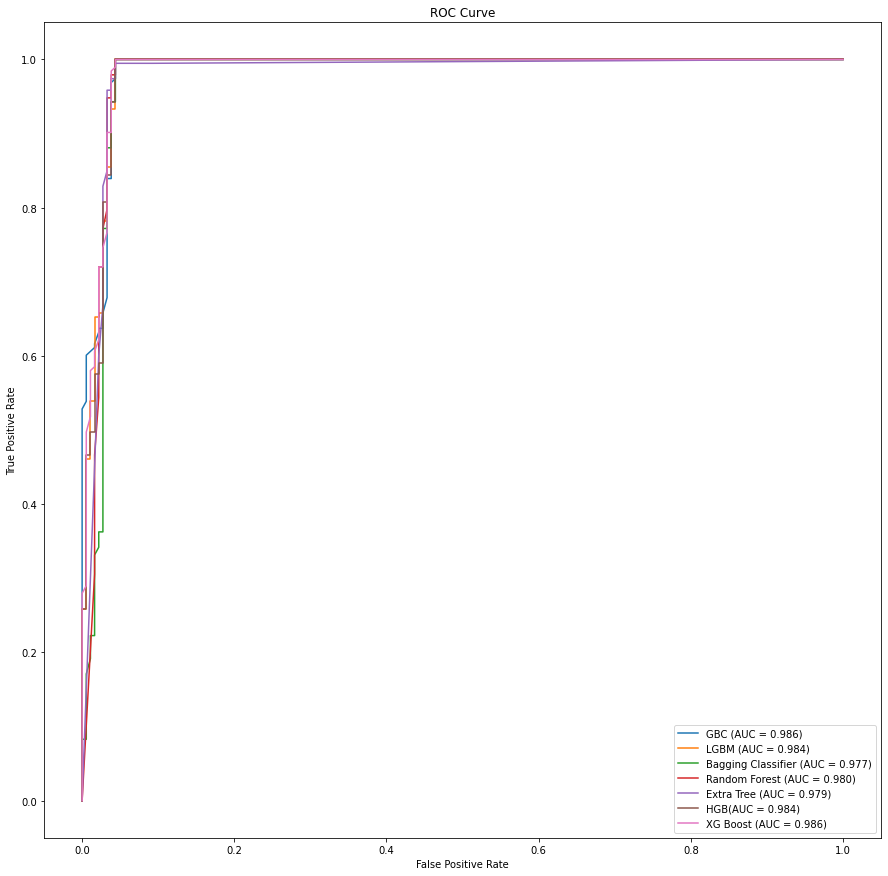

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.plot(gbc['fpr'], gbc['tpr'],   label='GBC (AUC = %0.3f)' % gbc['auc'])
plt.plot(lgbm['fpr'], lgbm['tpr'],  label='LGBM (AUC = %0.3f)' % lgbm['auc'])
plt.plot(bc['fpr'], bc['tpr'],  label='Bagging Classifier (AUC = %0.3f)' % bc['auc'])
plt.plot(rf['fpr'], rf['tpr'], label='Random Forest (AUC = %0.3f)' % rf['auc'])
plt.plot(etc['fpr'], etc['tpr'], label='Extra Tree (AUC = %0.3f)' % etc['auc'])
plt.plot(hgb['fpr'], hgb['tpr'],  label='HGB(AUC = %0.3f)' % hgb['auc'])
plt.plot(xgb['fpr'], xgb['tpr'], label='XG Boost (AUC = %0.3f)' % xgb['auc'])

# Title
plt.title('ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.grid(False)
plt.show()

In [ ]:
%%time
XGB.predict(xtest)

CPU times: user 3.26 ms, sys: 1.04 ms, total: 4.29 ms
Wall time: 4.44 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
RF.predict(xtest)

CPU times: user 16.3 ms, sys: 37 µs, total: 16.3 ms
Wall time: 16.5 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
ETC.predict(xtest)

CPU times: user 19 ms, sys: 0 ns, total: 19 ms
Wall time: 21.1 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
SGDC.predict(xtest)

CPU times: user 2.81 ms, sys: 0 ns, total: 2.81 ms
Wall time: 2.61 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
MLP.predict(xtest)

CPU times: user 4.7 ms, sys: 5.72 ms, total: 10.4 ms
Wall time: 7.87 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
HGB.predict(xtest)

CPU times: user 10.7 ms, sys: 690 µs, total: 11.4 ms
Wall time: 7.34 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
LGBM.predict(xtest)

CPU times: user 4.56 ms, sys: 8.08 ms, total: 12.6 ms
Wall time: 9.01 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
GBC.predict(xtest)

CPU times: user 2.73 ms, sys: 2.95 ms, total: 5.68 ms
Wall time: 3.64 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
ABC.predict(xtest)

CPU times: user 16.5 ms, sys: 8.14 ms, total: 24.6 ms
Wall time: 12.7 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
DT.predict(xtest)

CPU times: user 2.03 ms, sys: 5 µs, total: 2.04 ms
Wall time: 2.05 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
KNNC.predict(xtest)

CPU times: user 29.1 ms, sys: 10.8 ms, total: 39.9 ms
Wall time: 30.2 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
%%time
GNB.predict(xtest)

CPU times: user 4 ms, sys: 2.24 ms, total: 6.23 ms
Wall time: 3.65 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

# ANN

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc=StandardScaler()
sc.fit(xtrain)

xtrain_sc=sc.transform(xtrain)
xtest_sc=sc.transform(xtest)

xtrain_sc_df=pd.DataFrame(xtrain_sc,columns=xtrain.columns)
xtest_sc_df=pd.DataFrame(xtest_sc,columns=xtrain.columns)

xtrain=xtrain_sc_df
xtest=xtest_sc_df

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.4 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
import tensorflow as tf

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
     directory='Typhoid',
    project_name='Typhoid')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(xtrain, ytrain,
             epochs=50,
             validation_split=0.2,#validation_data=(xtest, ytest)
             )

Trial 15 Complete [00h 00m 14s]
val_accuracy: 0.982300877571106

Best val_accuracy So Far: 0.991150438785553
Total elapsed time: 00h 05m 37s


In [ ]:
tuner.results_summary(num_trials=1) 

Results summary
Results in Typhoid/Typhoid
Showing 1 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 64
units_1: 352
learning_rate: 0.01
units_2: 352
units_3: 352
units_4: 384
units_5: 128
units_6: 320
units_7: 320
units_8: 64
units_9: 416
units_10: 64
Score: 0.991150438785553


In [ ]:
besthp=tuner.get_best_hyperparameters(num_trials=1)[0]  

In [ ]:
besthp

In [ ]:
print(besthp.get('learning_rate'))

0.01


In [ ]:
model=tuner.hypermodel.build(besthp)

In [ ]:
'''
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold
        
    def on_epoch_end(self, epoch, logs=None):
      val_acc = logs["accuracy"]
      if val_acc >= self.threshold:
        self.model.stop_training = True

callback=MyThresholdCallback(threshold=1.0)
'''

'\nclass MyThresholdCallback(tf.keras.callbacks.Callback):\n    def __init__(self, threshold):\n        super(MyThresholdCallback, self).__init__()\n        self.threshold = threshold\n        \n    def on_epoch_end(self, epoch, logs=None):\n      val_acc = logs["accuracy"]\n      if val_acc >= self.threshold:\n        self.model.stop_training = True\n\ncallback=MyThresholdCallback(threshold=1.0)\n'

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)


In [ ]:
history=model.fit(xtrain,ytrain,epochs=500,
                 # validation_data=(xtest, ytest))
                  validation_split=0.2)

Epoch 1/500
29/29 [==============================] - 1s 12ms/step - loss: 0.3596 - accuracy: 0.9335 - val_loss: 0.1277 - val_accuracy: 0.9779
Epoch 2/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1384 - accuracy: 0.9712 - val_loss: 0.1061 - val_accuracy: 0.9779
Epoch 3/500
29/29 [==============================] - 0s 6ms/step - loss: 0.1130 - accuracy: 0.9712 - val_loss: 0.1085 - val_accuracy: 0.9823
Epoch 4/500
29/29 [==============================] - 0s 6ms/step - loss: 0.1071 - accuracy: 0.9723 - val_loss: 0.0920 - val_accuracy: 0.9823
Epoch 5/500
29/29 [==============================] - 0s 6ms/step - loss: 0.1065 - accuracy: 0.9745 - val_loss: 0.1196 - val_accuracy: 0.9823
Epoch 6/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.9767 - val_loss: 0.1162 - val_accuracy: 0.9823
Epoch 7/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0714 - accuracy: 0.9767 - val_loss: 0.1591 - val_accuracy: 0.9823
Epoch 8/500


In [ ]:
r=history

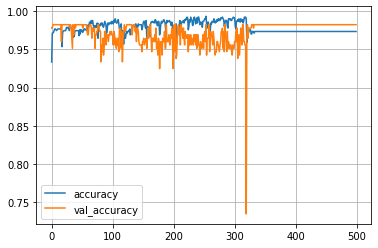

In [ ]:
# import libraries
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.grid()
plt.legend()
plt.show()

In [ ]:
le = LabelEncoder()
y_pred = model.predict(xtest)
y_pred = y_pred > 0.5
le2 = LabelEncoder()
y_pred = le.fit_transform(y_pred)

12/12 [==============================] - 0s 2ms/step


In [ ]:
# metrics
acc_score = accuracy_score(ytest, y_pred)
cm = confusion_matrix(ytest, y_pred)


In [ ]:
print(acc_score)

0.973404255319149


In [ ]:
print(cm)

[[173  10]
 [  0 193]]


In [ ]:

print('Confusion matrix is :')
cm = confusion_matrix(ytest, y_pred)
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, y_pred)
print("Classification Report : ")
print (classificationReport)
print("\n")
print("F1 Score :",f1_score(ytest, y_pred,average='macro'))
print("Precision :", precision_score(ytest, y_pred,average='macro'))
print("Recall :", recall_score(ytest, y_pred,average='macro'))

print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))

Confusion matrix is :
[[173  10]
 [  0 193]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       183
           1       0.95      1.00      0.97       193

    accuracy                           0.97       376
   macro avg       0.98      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



F1 Score : 0.9733287935535127
Precision : 0.9753694581280787
Recall : 0.9726775956284153
Sensitivity :  1.0
Specificity :  0.9507389162561576
false positive rate :  0.04926108374384237
false negative rate :  0.0
Negative Predictive Value :  1.0
False Discovery rate :  0.0546448087431694
Mean Absolute Error: 0.026595744680851064


# Hyper parameter Tuning

In [ ]:
## Hyper Parameter Optimization
max_depth = [int(x) for x in np.linspace(10, 11110, num = 11)]
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
# "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "max_depth"        : max_depth,
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
#rf_randomcv=RandomizedSearchCV(estimator=classifier,param_distributions=params,n_iter=500,cv=2,verbose=2,
                          #     random_state=100,n_jobs=-1)

rf_randomcv=GridSearchCV(estimator=classifier,param_grid=params,cv=2,verbose=2,
                               n_jobs=-1)

### fit the randomized model
rf_randomcv.fit(xtrain,ytrain)

Fitting 2 folds for each of 5280 candidates, totalling 10560 fits


GridSearchCV(cv=2, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [10, 1120, 2230, 3340, 4450, 5560, 6670,
                                       7780, 8890, 10000, 11110],
                         'min_child_weight': [1, 3, 5, 7]},
             verbose=2)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred=best_random_grid.predict(xtest)
print(confusion_matrix(ytest,y_pred))
print("Accuracy Score {}".format(accuracy_score(ytest,y_pred)))
print("Classification report: {}".format(classification_report(ytest,y_pred)))

[[175   8]
 [  2 191]]
Accuracy Score 0.973404255319149
Classification report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97       183
           1       0.96      0.99      0.97       193

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



In [ ]:
best_random_grid

XGBClassifier(colsample_bytree=0.4, gamma=0.0, max_depth=10)

In [ ]:

print('Confusion matrix is :')
cm = confusion_matrix(ytest, best_random_grid.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, best_random_grid.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',best_random_grid.score(xtest,ytest))
print("Training accuracy:",best_random_grid.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, best_random_grid.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, best_random_grid.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, best_random_grid.predict(xtest),average='macro'))
probs = best_random_grid.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, best_random_grid.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(best_random_grid,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
gnb=roc_auc_values(best_random_grid)

Confusion matrix is :
[[175   8]
 [  2 191]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       183
           1       0.96      0.99      0.97       193

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376



Testing accuracy :  0.973404255319149
Training accuracy: 97.96099290780141
F1 Score : 0.9733560090702947
Precision : 0.974249779973313
Recall : 0.9729607293524731
AUC = 0.981
Sensitivity :  0.9887005649717514
Specificity :  0.9597989949748744
false positive rate :  0.04020100502512563
false negative rate :  0.011299435028248588
Negative Predictive Value :  0.9896373056994818
False Discovery rate :  0.04371584699453552
Mean Absolute Error: 0.026595744680851064
10 fold cross validation:  [0.99337748 0.94701987 0.97350993 0.98013245 0.94666667 0.98
 0.97333333 0.98666667 0.98666667 0.98      ]
Me